<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/book-notes/ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's first download a utility file for setting up Google Colab
!wget https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py

from colab_utils import setup_fastai_colab
setup_fastai_colab()

--2020-08-28 17:30:35--  https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426 (1.4K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   1.39K  --.-KB/s    in 0s      

2020-08-28 17:30:36 (24.5 MB/s) - ‘colab_utils.py’ saved [1426/1426]

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!
Done!


In [3]:
from fastai2.vision.all import *

In [4]:
path = untar_data(URLs.PETS)/'images'

In [5]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [6]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=lambda x: x[0].isupper(),
    item_tfms=Resize(224)
)

In [10]:
resnet34

<function torchvision.models.resnet.resnet34>

In [11]:
error_rate

<function fastai2.metrics.error_rate>

In [13]:
error_rate??

In [14]:
accuracy??

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.137455,0.024873,0.007442,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.059530,0.023724,0.005413,01:11


Now, let me try the very same idea on different datasets. First, let me build a hotdog/nothotdog classifier:

In [19]:
!git clone https://github.com/WittmannF/AutoDL.git

Cloning into 'AutoDL'...
remote: Enumerating objects: 2731, done.
remote: Total 2731 (delta 0), reused 0 (delta 0), pack-reused 2731
Receiving objects: 100% (2731/2731), 58.08 MiB | 15.33 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [23]:
ImageDataLoaders.from_folder?

In [27]:
ls AutoDL/hotdog-not-hotdog/

train/  valid/


In [28]:
get_image_files('AutoDL/hotdog-not-hotdog/')

(#70) [Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90930.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90167.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/91432.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90116.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/89892.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/93961.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/4889.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/1167.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/4781.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/93653.jpg')...]

In [33]:
path = Path('AutoDL/hotdog-not-hotdog/')

In [34]:
dls = ImageDataLoaders.from_folder( 
    path,
    get_image_files(path),
    seed=42,
    item_tfms=Resize(224)
)

IndexError: ignored

In [48]:
path = untar_data(URLs.MNIST_TINY)
dls = ImageDataLoaders.from_folder(path)

In [49]:
path

Path('/root/.fastai/data/mnist_tiny')

In [61]:
ls {path}

labels.csv  models/  test/  train/  valid/


In [62]:
ls {path/'train'}

3/  7/


In [58]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')

In [59]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [60]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.927884,0.394021,0.816881,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.311168,0.167451,0.944206,00:02


In [40]:
ls 'AutoDL/hotdog-not-hotdog/'

train/  valid/


In [45]:
dls = ImageDataLoaders.from_folder('AutoDL/hotdog-not-hotdog/',
                                   item_tfms=Resize(224))

In [46]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [47]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,nan,5.835454,0.500000,00:01


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,5.835454,0.500000,00:00


In [64]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.948697,0.353286,0.158798,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.326237,0.185339,0.070100,00:02


In [65]:
!git clone https://github.com/WittmannF/ImageDataGenerator-example.git

Cloning into 'ImageDataGenerator-example'...
remote: Enumerating objects: 341, done.
remote: Total 341 (delta 0), reused 0 (delta 0), pack-reused 341
Receiving objects: 100% (341/341), 6.69 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

In [66]:
ls

01_intro.ipynb           10_nlp.ipynb            19_learner.ipynb
02_production.ipynb      11_midlevel_data.ipynb  20_conclusion.ipynb
03_ethics.ipynb          12_nlp_dive.ipynb       app_blog.ipynb
04_mnist_basics.ipynb    13_convolutions.ipynb   app_jupyter.ipynb
05_pet_breeds.ipynb      14_resnet.ipynb         AutoDL/
06_multicat.ipynb        15_arch_details.ipynb   ImageDataGenerator-example/
07_sizing_and_tta.ipynb  16_accel_sgd.ipynb      images/
08_collab.ipynb          17_foundations.ipynb    settings.ini
09_tabular.ipynb         18_CAM.ipynb            utils.py


In [68]:
ls ImageDataGenerator-example/flow_from_directory/

train/  valid/


In [69]:
ls /root/.fastai/data/mnist_tiny/

labels.csv  models/  test/  train/  valid/


In [72]:
dls = ImageDataLoaders.from_folder('./ImageDataGenerator-example/flow_from_directory/',
                                   item_tfms=Resize(224)
                                   )

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.088205,0.139988,0.968750,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.145627,0.125397,0.968750,00:03


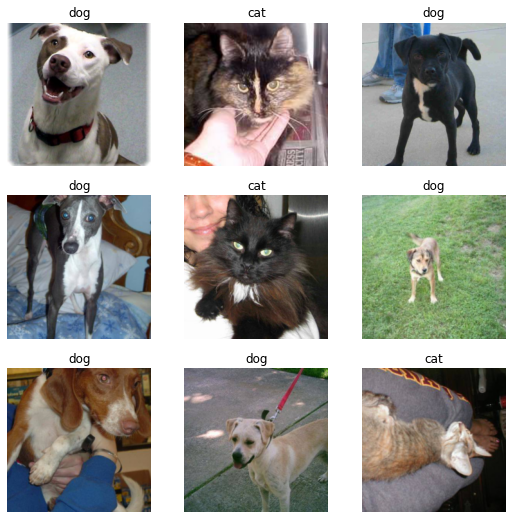

In [85]:
dls.show_batch()

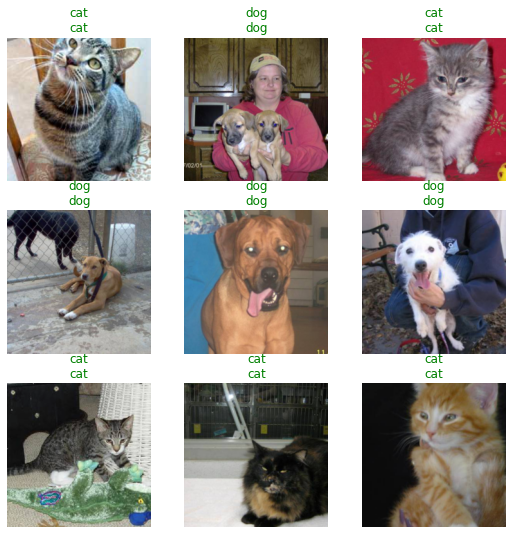

In [86]:
learn.show_results()

In [87]:
learn.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_

### Some non-imagery ideas
Plagiarism detection: Create a 'picture' of each document based on their conversion into vectors. Next, I would extract theif features and group them by their similarity. Plagiarized documents would have very similar vectors. 

In [ ]:
import keras
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  1,  1,  0],
        ...,
        [ 2,  0,  0,  0, ..., 99, 58,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  1, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ..., 41,  0,  0,  0],
        ...,
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        [ 0,  0,  0,  0, ...,  0,  0,  0,  0],
        ...,
        [ 0,  0, 

In [ ]:
y_train[0]

9

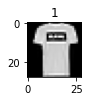

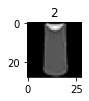

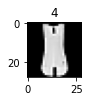

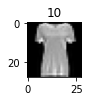

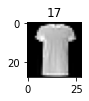

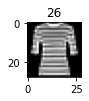

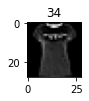

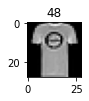

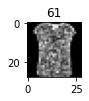

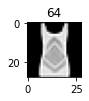

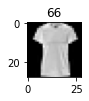

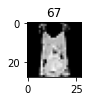

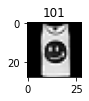

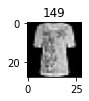

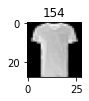

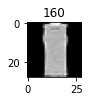

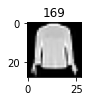

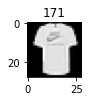

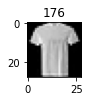

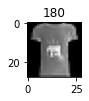

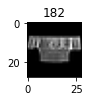

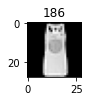

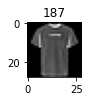

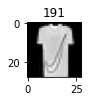

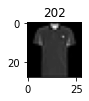

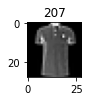

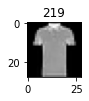

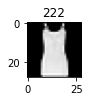

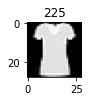

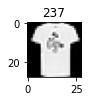

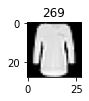

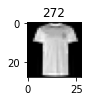

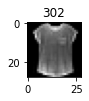

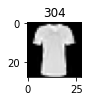

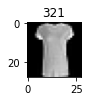

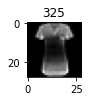

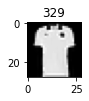

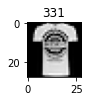

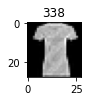

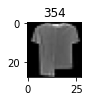

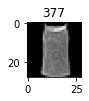

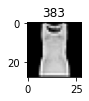

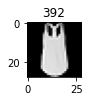

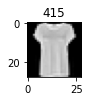

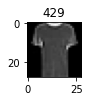

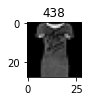

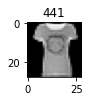

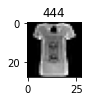

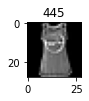

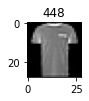

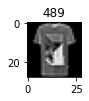

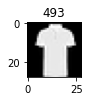

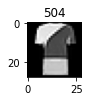

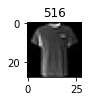

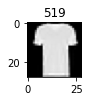

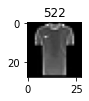

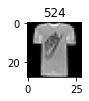

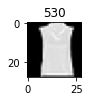

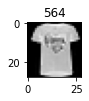

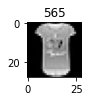

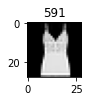

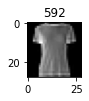

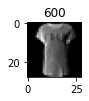

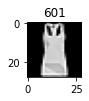

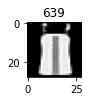

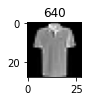

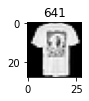

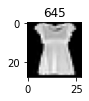

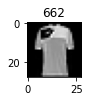

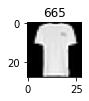

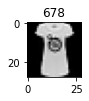

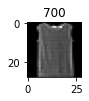

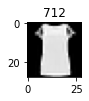

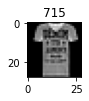

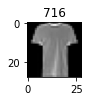

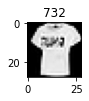

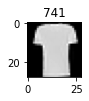

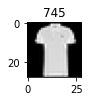

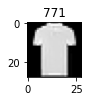

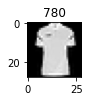

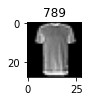

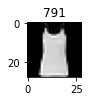

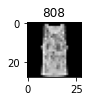

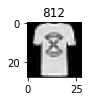

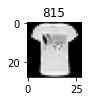

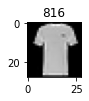

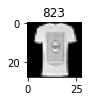

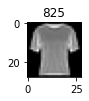

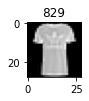

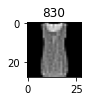

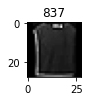

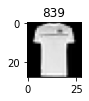

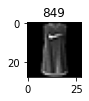

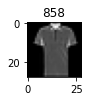

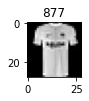

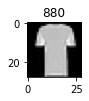

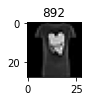

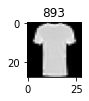

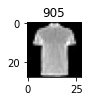

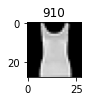

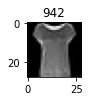

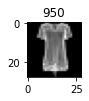

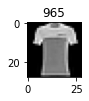

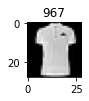

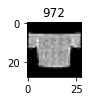

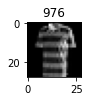

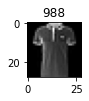

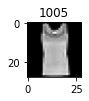

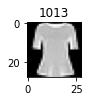

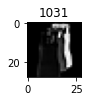

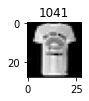

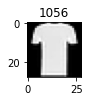

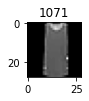

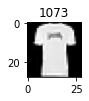

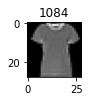

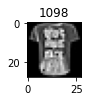

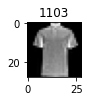

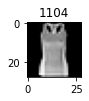

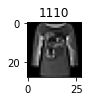

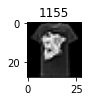

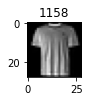

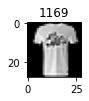

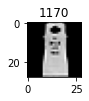

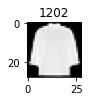

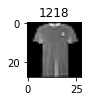

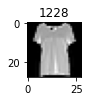

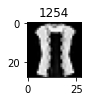

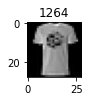

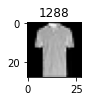

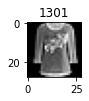

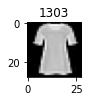

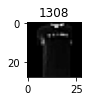

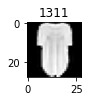

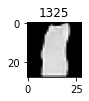

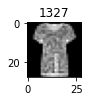

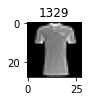

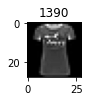

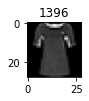

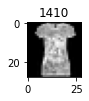

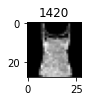

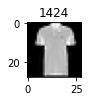

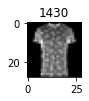

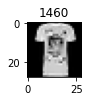

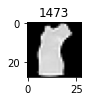

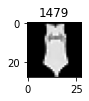

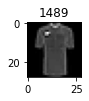

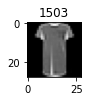

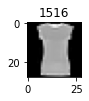

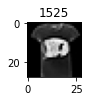

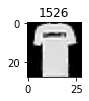

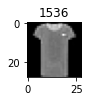

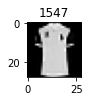

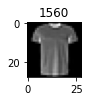

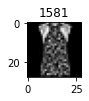

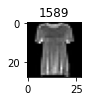

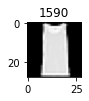

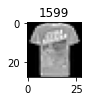

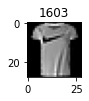

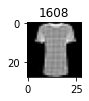

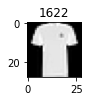

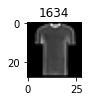

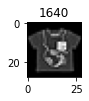

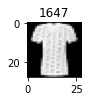

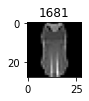

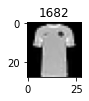

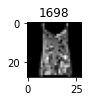

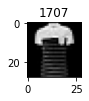

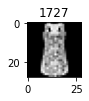

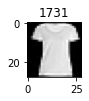

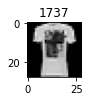

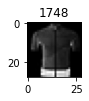

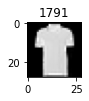

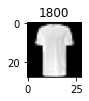

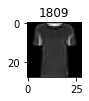

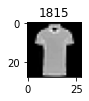

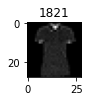

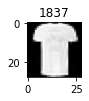

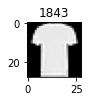

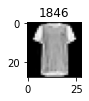

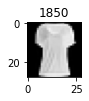

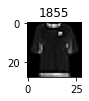

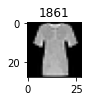

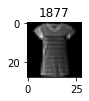

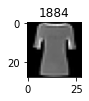

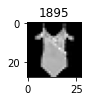

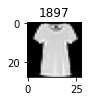

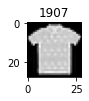

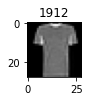

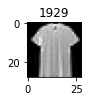

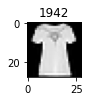

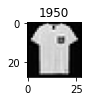

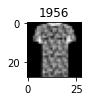

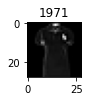

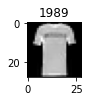

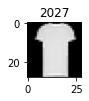

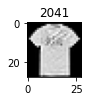

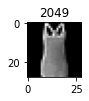

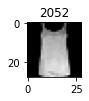

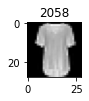

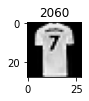

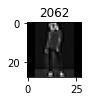

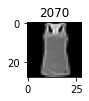

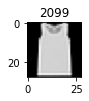

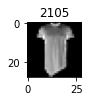

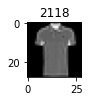

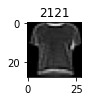

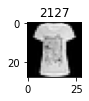

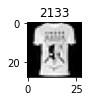

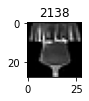

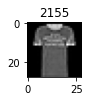

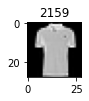

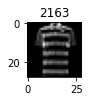

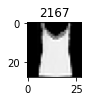

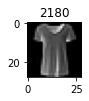

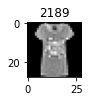

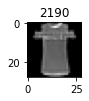

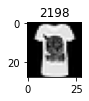

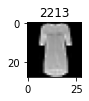

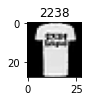

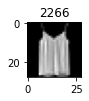

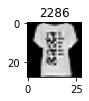

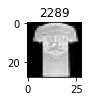

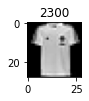

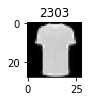

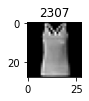

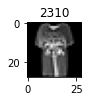

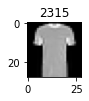

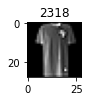

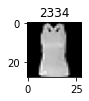

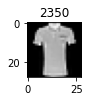

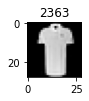

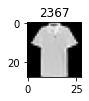

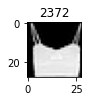

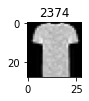

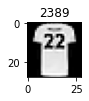

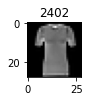

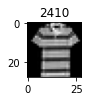

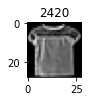

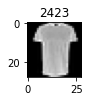

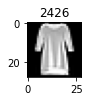

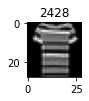

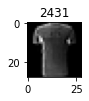

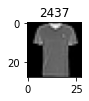

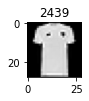

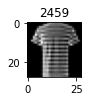

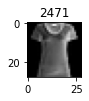

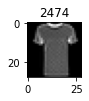

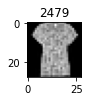

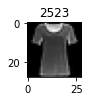

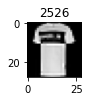

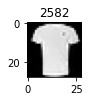

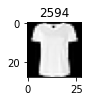

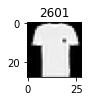

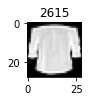

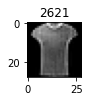

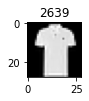

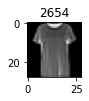

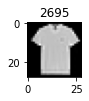

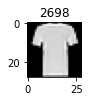

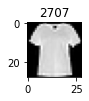

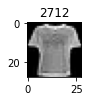

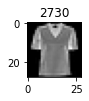

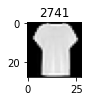

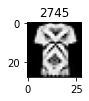

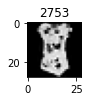

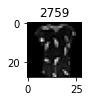

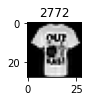

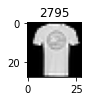

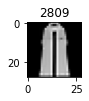

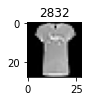

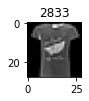

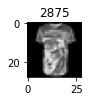

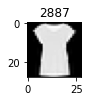

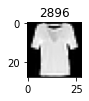

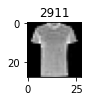

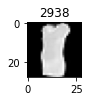

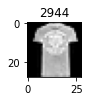

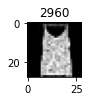

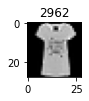

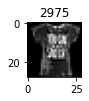

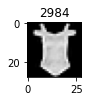

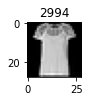

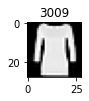

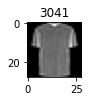

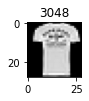

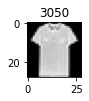

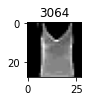

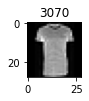

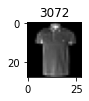

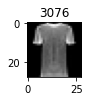

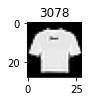

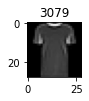

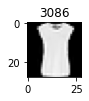

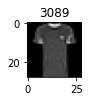

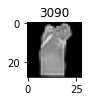

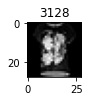

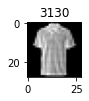

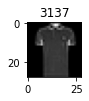

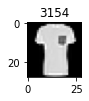

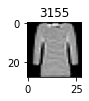

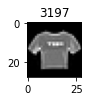

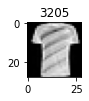

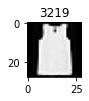

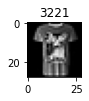

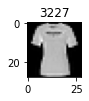

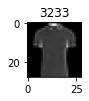

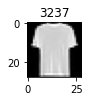

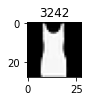

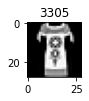

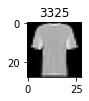

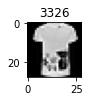

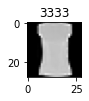

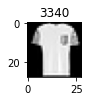

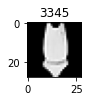

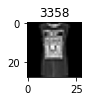

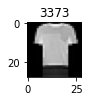

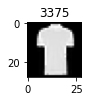

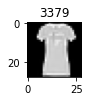

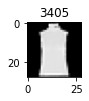

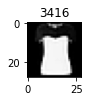

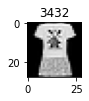

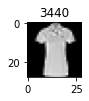

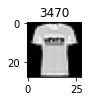

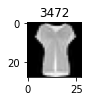

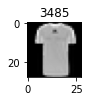

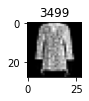

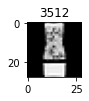

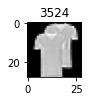

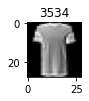

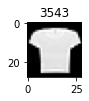

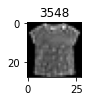

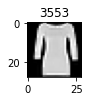

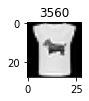

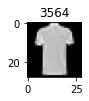

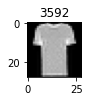

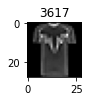

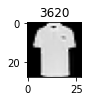

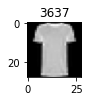

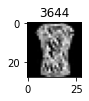

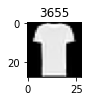

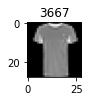

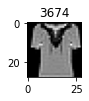

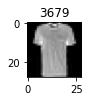

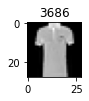

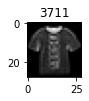

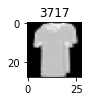

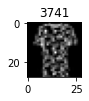

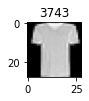

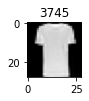

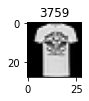

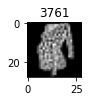

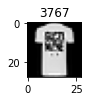

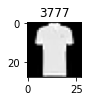

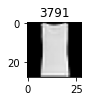

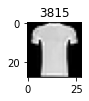

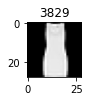

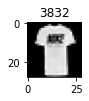

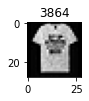

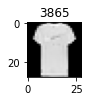

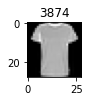

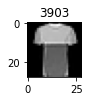

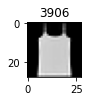

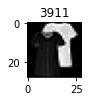

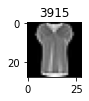

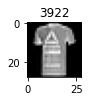

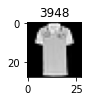

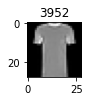

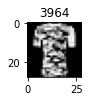

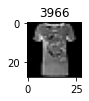

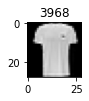

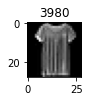

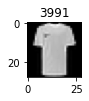

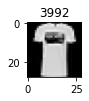

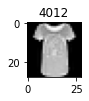

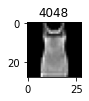

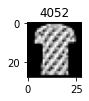

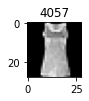

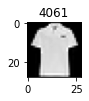

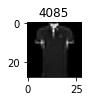

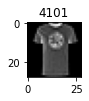

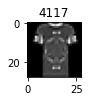

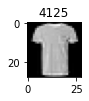

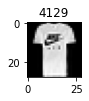

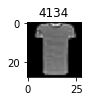

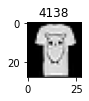

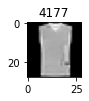

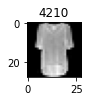

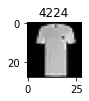

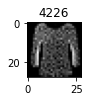

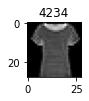

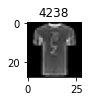

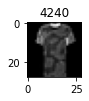

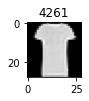

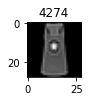

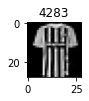

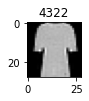

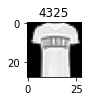

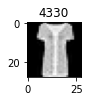

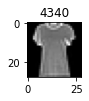

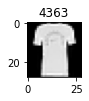

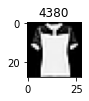

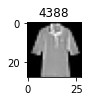

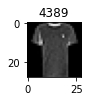

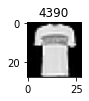

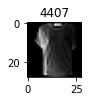

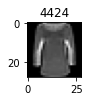

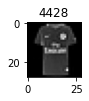

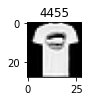

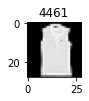

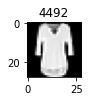

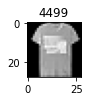

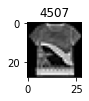

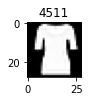

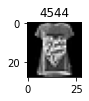

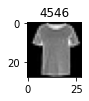

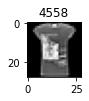

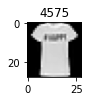

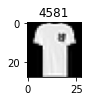

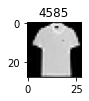

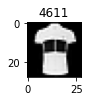

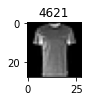

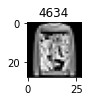

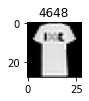

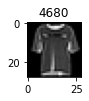

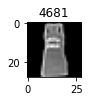

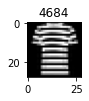

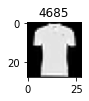

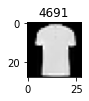

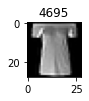

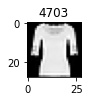

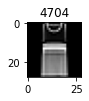

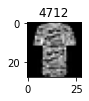

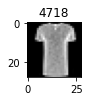

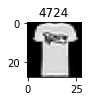

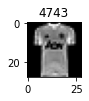

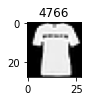

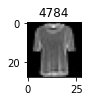

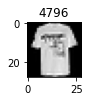

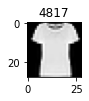

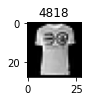

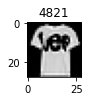

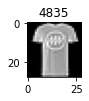

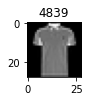

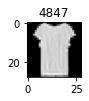

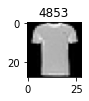

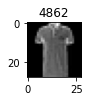

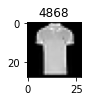

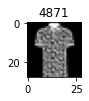

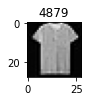

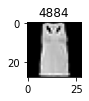

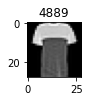

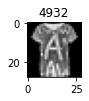

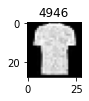

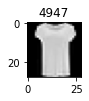

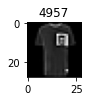

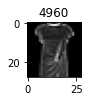

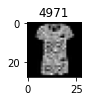

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5000):
    if y_train[idx]==0:
        plt.figure(figsize=(1,1))
        plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
        plt.title(idx)
        plt.show()